# Multi-Layer Perceptron on MNIST

## [ CONTENTS ] 

1. About the dataset<br>
2. Objective<br>
3. Loading Libraries & Data <br>
4. Data Preprocessing <br>
5. MLP Model<br>
6. Bag of Words (BoW)<br>
7. TF-IDF<br>
8. Word2Vec<br>
9. Avg W2V & TFIDF-W2V<br>
    9.1 TF-IDF weighted W2V
10. TFIDF with RBF kernel<br>
11. Summary<br>

## 1. About the dataset
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.<br>
<br>
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

## 2. Objective:
The objective here is to classify handwritten digits using Multi-Layer Perceptron. Apart from that, here I will conduct various experiments with number of layers, number of hidden units, types of optimizers, different normalization and their effect on classification.
<br>
(**Note: Here I'm using Keras for the simplicity and ease of implementation which uses tensorflow at it's backend.**) 

## 3. Loading Libraries & Data

In [41]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

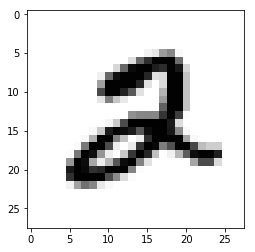

In [6]:
plt.imshow(train_images[5], cmap = 'binary')

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

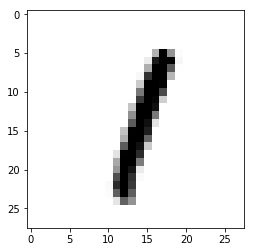

In [10]:
plt.imshow(test_images[5], cmap = 'binary')

## 4. Data Preprocessing

In [11]:
# normalizing train and test data 
# It helps in quicker convergence 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(train_labels)

## 5. Experiments

### 5.1  Hidden Layer 

In [34]:
def mlp_builder(num_layer):
    
    if num_layer == 2:
        
        network = models.Sequential()
        network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
        network.add(layers.Dense(128, activation = 'relu'))
        network.add(layers.Dense(10, activation = 'softmax'))
        
        network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
        
        history = network.fit(train_images, train_labels,
                              validation_split = 0.33, epochs = 20,
                              batch_size = 128, verbose = 0)
        train_cv_plot(history)
    
    elif num_layer == 3:
        
        network = models.Sequential()
        network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
        network.add(layers.Dense(256, activation = 'relu'))
        network.add(layers.Dense(128, activation = 'relu'))
        network.add(layers.Dense(10, activation = 'softmax'))
        
        network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
        
        history = network.fit(train_images, train_labels,
                              validation_split = 0.33, epochs = 20,
                              batch_size = 128, verbose = 0)
        train_cv_plot(history)
        
    else :
        
        network = models.Sequential()
        network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
        network.add(layers.Dense(256, activation = 'relu'))
        network.add(layers.Dense(128, activation = 'relu'))
        network.add(layers.Dense(64, activation = 'relu'))
        network.add(layers.Dense(32, activation = 'relu'))
        network.add(layers.Dense(10, activation = 'softmax'))
        
        network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
        
        history = network.fit(train_images, train_labels,
                              validation_split = 0.33, epochs = 20,
                              batch_size = 128, verbose = 0)
        train_cv_plot(history)

In [49]:
def train_cv_plot(history):
    
    sns.set()
    # train-cv plot for accuracy
    plt.figure(figsize = (8, 5))
    plt.plot(np.arange(1, 21, step = 1), history.history['acc'], color = 'b')
    plt.plot(np.arange(1, 21, step = 1), history.history['val_acc'], color = 'r')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'CV'])
    plt.show()
        
    # train-cv plot for loss
    plt.figure(figsize = (8, 5))
    plt.plot(np.arange(1, 21, step = 1), history.history['loss'], color = 'b')
    plt.plot(np.arange(1, 21, step = 1), history.history['val_loss'], color = 'r')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'CV'])
    plt.show()

### 5.2 Hidden Units

In [78]:
def var_hidden_units():
    
    err_stack = np.arange(1, 21)
    for hidden_units in [32, 64, 128, 256, 512]:
        network = models.Sequential()
        network.add(layers.Dense(hidden_units, activation = 'relu', input_shape = (28 * 28,)))
        network.add(layers.Dense(10, activation = 'sigmoid'))
    
        network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
    
        history = network.fit(train_images, train_labels, batch_size = 128, 
                              verbose = 0, epochs = 20)
        err_stack = np.vstack([err_stack, history.history['loss']])
        
    hidunits_err_plot(err_stack[1:, :])

In [74]:
def hidunits_err_plot(err_stack):
    
    sns.set()
    plt.figure(figsize = (8, 5))
    plt.plot(np.arange(1, 21, step = 1), err_stack[0, :], color = 'r')
    plt.plot(np.arange(1, 21, step = 1), err_stack[1, :], color = 'g')
    plt.plot(np.arange(1, 21, step = 1), err_stack[2, :], color = 'b')
    plt.plot(np.arange(1, 21, step = 1), err_stack[3, :], color = 'c')
    plt.plot(np.arange(1, 21, step = 1), err_stack[4, :], color = 'm')
    
    plt.title('Hidden Units Comparision')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['32-units', '64-units', '128-units', '256-units', '512-units'])
    
    plt.show()

### 5.3 Various Optimizers 

In [65]:
def var_optimizer():
    
    err_stack = np.arange(1, 21)
    optimizer_list = ['sgd', 'rmsprop', 'adam']
    network = models.Sequential()
    network.add(layers.Dense(8, activation = 'sigmoid', input_shape = (28 * 28,)))
    network.add(layers.Dense(10, activation = 'sigmoid'))
    
    for optmzr in optimizer_list:
        network.compile(optimizer = optmzr,
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
        history = network.fit(train_images, train_labels, batch_size = 128, 
                              epochs = 20, verbose = 0)
        err_stack = np.vstack([err_stack, history.history['loss']])
    
    err_plot(err_stack[1:, :])

In [66]:
def err_plot(err_stack):
    
    sns.set()
    plt.figure(figsize = (8, 5))
    plt.plot(np.arange(1, 21, step = 1), err_stack[0, :], color = 'r')
    plt.plot(np.arange(1, 21, step = 1), err_stack[1, :], color = 'b')
    plt.plot(np.arange(1, 21, step = 1), err_stack[2, :], color = 'g')
    
    plt.title('Optimizers Comparision')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam'])
    
    plt.show()

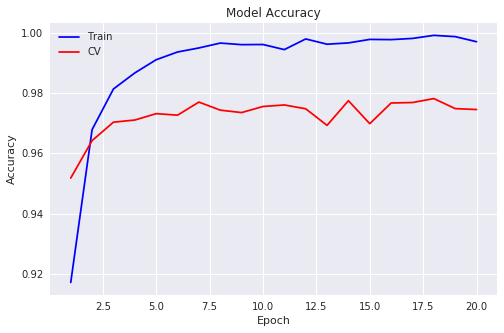

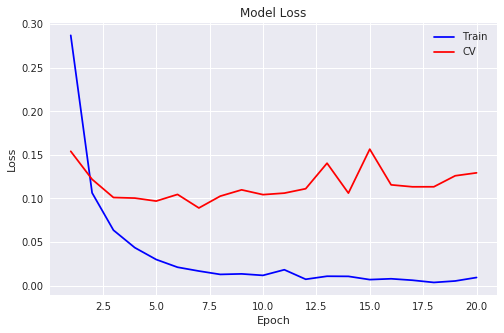

In [50]:
mlp_builder(2)

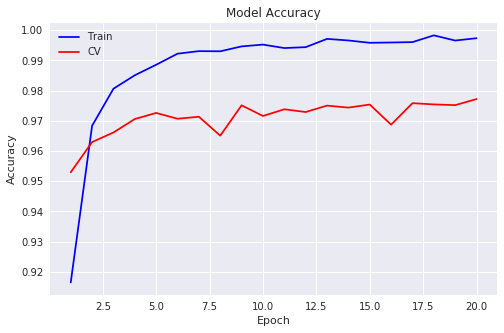

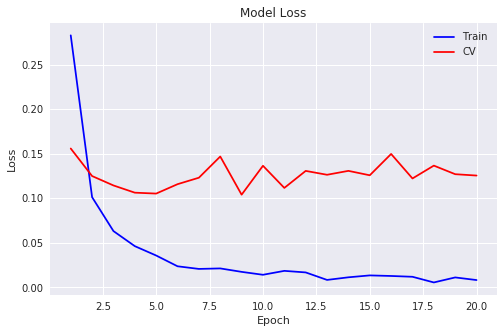

In [51]:
mlp_builder(3)

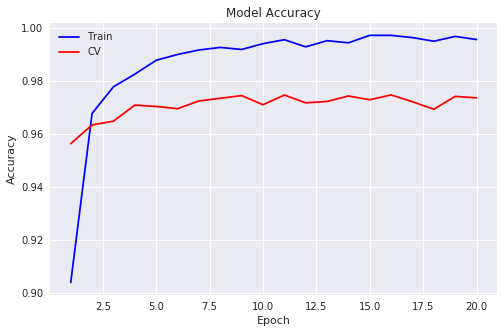

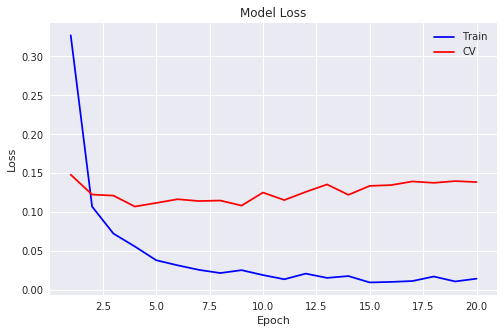

In [52]:
mlp_builder(5)

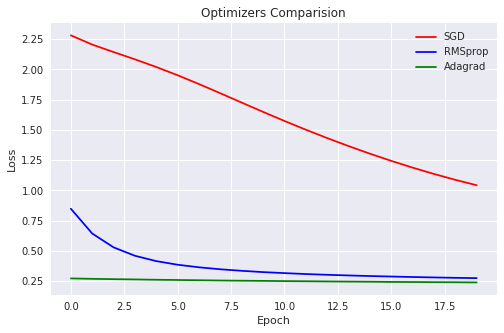

In [67]:
var_optimizer()

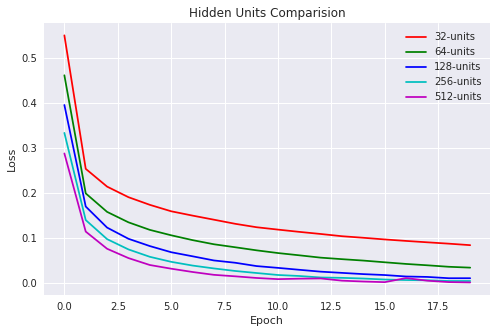

In [79]:
var_hidden_units()